In [1]:
%matplotlib inline

import collections

from shapely.geometry import box
from shapely.geometry import GeometryCollection
from shapely.geometry import Polygon, MultiPolygon
from shapely.geometry import MultiPoint

import warnings

import geopandas as gpd
from shapely.geometry import Polygon, MultiPolygon

# Prepare the data

### 1st geometry no interior (poly)

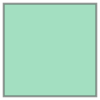

In [13]:
coords = [(0., 0.), (0., 3.), (3., 3.), (3., 0.), (0., 0.)]
poly = Polygon(coords)

poly

### 2nd geometry no interior (poly2)

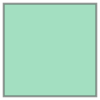

In [4]:
coords = [(5., 0.), (5., 3.), (8., 3.), (8., 0.), (5., 0.)]
poly2 = Polygon(coords)

poly2

### 1st geometry 1 interior no duplicates (poly_int)

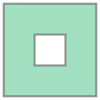

In [7]:
coords = [(0., 0.), (0., 3.), (3., 3.), (3., 0.), (0., 0.)]
interior = [(1., 1.), (1., 2.), (2., 2.), (2., 1.), (1., 1.)]
poly_int = Polygon(coords, [interior])

poly_int

### 1st geometry 1 interior 1 duplicate (poly_int_dupl)

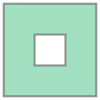

In [8]:
coords = [(0., 0.), (0., 3.), (3., 3.), (3., 0.), (0., 0.)]
interior = [(1., 1.), (1., 2.), (2., 2.), (2., 1.), (2., 1.), (1., 1.)]
poly_int_dupl = Polygon(coords, [interior])

poly_int_dupl

### 2nd geometry 1 interior 1 duplicate (poly2_int_dupl)

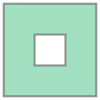

In [11]:
coords = [(5., 0.), (5., 3.), (8., 3.), (8., 0.), (5., 0.)]
interior = [(6., 1.), (6., 2.), (7., 2.), (7., 1.), (7., 1.), (6., 1.)]
poly2_int_dupl = Polygon(coords, [interior])

poly2_int_dupl

### 2nd geometry 1 interior 2 duplicates (poly2_int_2dupl)

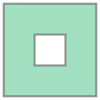

In [12]:
coords = [(5., 0.), (5., 3.), (8., 3.), (8., 0.), (5., 0.)]
interior = [(6., 1.), (6., 2.), (7., 2.), (7., 2.), (7., 1.), (7., 1.), (6., 1.)]
poly2_int_2dupl = Polygon(coords, [interior])

poly2_int_2dupl

### 3rd geometry 2 interiors no duplicates (poly3_int)

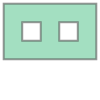

In [20]:
coords = [(0., 0.), (0., 3.), (5., 3.), (5., 0.), (0., 0.)]
interior = [(1., 1.), (1., 2.), (2., 2.), (2., 1.), (1., 1.)]
interior2 = [(3., 1.), (3., 2.), (4., 2.), (4., 1.), (3., 1.)]
poly3_int = Polygon(coords, [interior, interior2])

poly3_int

### 3rd geometry 2 interiors 1 duplicate each (poly3_int_2dupl)

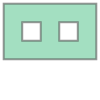

In [21]:
coords = [(0., 0.), (0., 3.), (5., 3.), (5., 0.), (0., 0.)]
interior = [(1., 1.), (1., 2.), (2., 2.), (2., 1.), (2., 1.), (1., 1.)]
interior2 = [(3., 1.), (3., 2.), (4., 2.), (4., 2.), (4., 1.), (4., 1.), (3., 1.)]
poly3_int_2dupl = Polygon(coords, [interior, interior2])

poly3_int_2dupl

## Save the data

In [24]:
test_data = {"description":[
                "geom1",
                "geom1 int dupl",
                "geom1 int & geom2",
                "geom1 & geom2 int dupl",
                "geom1 & geom2",
                "geom1 int dupl & geom2 int 2 dupl",
                "geom3 2 int",
                "geom3 2 int 1 dupl each"],
             "geometry":[
                 poly,
                 poly_int_dupl,
                 MultiPolygon([poly_int, poly2]),
                 MultiPolygon([poly, poly2_int_dupl]),
                 MultiPolygon([poly, poly2]),
                 MultiPolygon([poly_int_dupl, poly2_int_2dupl]),
                 poly3_int,
                 poly3_int_2dupl]
            }

In [25]:
gdf = gpd.GeoDataFrame(test_data)
gdf

,description,geometry
0,geom1,"POLYGON ((0 0, 0 3, 3 3, 3 0, 0 0))"
1,geom1 int dupl,"POLYGON ((0 0, 0 3, 3 3, 3 0, 0 0), (1 1, 1 2,..."
2,geom1 int & geom2,"(POLYGON ((0 0, 0 3, 3 3, 3 0, 0 0), (1 1, 1 2..."
3,geom1 & geom2 int dupl,"(POLYGON ((0 0, 0 3, 3 3, 3 0, 0 0)), POLYGON ..."
4,geom1 & geom2,"(POLYGON ((0 0, 0 3, 3 3, 3 0, 0 0)), POLYGON ..."
5,geom1 int dupl & geom2 int 2 dupl,"(POLYGON ((0 0, 0 3, 3 3, 3 0, 0 0), (1 1, 1 2..."
6,geom3 2 int,"POLYGON ((0 0, 0 3, 5 3, 5 0, 0 0), (1 1, 1 2,..."
7,geom3 2 int 1 dupl each,"POLYGON ((0 0, 0 3, 5 3, 5 0, 0 0), (1 1, 1 2,..."


In [27]:
gdf.to_file('interior_test_data.geojson', driver='GeoJSON')

## Read the data

In [2]:
gdf = gpd.read_file('../data/topology/interior_test_data.geojson')
gdf

,description,geometry
0,geom1,"POLYGON ((0 0, 0 3, 3 3, 3 0, 0 0))"
1,geom1 int dupl,"POLYGON ((0 0, 0 3, 3 3, 3 0, 0 0), (1 1, 1 2,..."
2,geom1 int & geom2,"(POLYGON ((0 0, 0 3, 3 3, 3 0, 0 0), (1 1, 1 2..."
3,geom1 & geom2 int dupl,"(POLYGON ((0 0, 0 3, 3 3, 3 0, 0 0)), POLYGON ..."
4,geom1 & geom2,"(POLYGON ((0 0, 0 3, 3 3, 3 0, 0 0)), POLYGON ..."
5,geom1 int dupl & geom2 int 2 dupl,"(POLYGON ((0 0, 0 3, 3 3, 3 0, 0 0), (1 1, 1 2..."
6,geom3 2 int,"POLYGON ((0 0, 0 3, 5 3, 5 0, 0 0), (1 1, 1 2,..."
7,geom3 2 int 1 dupl each,"POLYGON ((0 0, 0 3, 5 3, 5 0, 0 0), (1 1, 1 2,..."


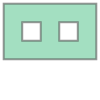

In [12]:
gdf.geometry[7]